In [42]:
import os, csv
import pandas as pd
import numpy as np
from keras.preprocessing import sequence
import matplotlib.pyplot as plt
from keras.models import Sequential, Model
from keras import layers, Input
from keras.optimizers import RMSprop, Adam
from sklearn.model_selection import train_test_split

from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

import csv
import os,random

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Convolution1D
from keras.layers.core import Dropout, Activation, Flatten
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import *
from keras.callbacks import EarlyStopping

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dropout, Activation, Flatten
from keras.layers import LSTM, SimpleRNN, Bidirectional
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import *
from keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error
from math import sqrt

import datetime
now = datetime.datetime.now

(505, 2)
(904, 2)
(479, 2)
(552, 2)
(996, 2)
(697, 2)
(561, 2)
(880, 2)
(1134, 2)
(799, 2)
(652, 2)
(591, 2)
(435, 2)
(520, 2)
(948, 2)
(602, 2)
(437, 2)
(928, 2)
(853, 2)
(754, 2)
(599, 2)
(568, 2)
(518, 2)
(507, 2)
(551, 2)
(520, 2)
(570, 2)
(912, 2)
(1094, 2)
(920, 2)
(1135, 2)
(627, 2)
(535, 2)
(417, 2)
(507, 2)
(714, 2)
(444, 2)
(314, 2)
(568, 2)
(838, 2)
(1003, 2)
(783, 2)
(817, 2)
(898, 2)
(1515, 2)
(577, 2)
(621, 2)
(399, 2)
(777, 2)
(526, 2)
(623, 2)
(813, 2)
(2487, 2)
(699, 2)
(288, 2)
here
(288, 2)
(706, 2)
(1222, 2)
(405, 2)
(974, 2)
(1094, 2)
(1003, 2)
(1159, 2)
(596, 2)
(502, 2)
(1221, 2)
(781, 2)
(1543, 2)
(392, 2)
(568, 2)
(459, 2)
(476, 2)
(605, 2)
(499, 2)
(540, 2)
(453, 2)
(658, 2)
(532, 2)
(700, 2)
x_val shape: (78, 400, 2)


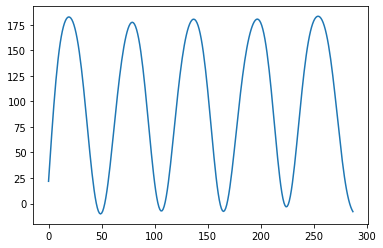

In [43]:
types = {'B_ID':8, 'E_ID':17, 'NE_ID':27, 'S_ID':10, 'P_ID':16}
x_val = []
x_id = []
for ids, vals in types.items():
    for i in range(1,vals+1):
        x_id.append(ids + str(i))
        try: 
            with open("./po-cf-ex-1-features/"+ids+str(i)+".csv", 'r') as f:
                temp = list(csv.reader(f, delimiter = ","))
            temp = np.asarray(temp)
            temp = temp[:,:2].astype(np.float64)
        except:
            print(ids, i)
        print(temp.shape)
        if i==3 and ids == 'S_ID':
            print("here")
            plt.plot(temp[:,1])
            print(temp.shape)
        x_val.append(temp.tolist())
x_val = np.asarray(sequence.pad_sequences(x_val, maxlen=400)).astype(np.float64)
print("x_val shape:", x_val.shape)
# len(x_val[1][0])

In [44]:
# df = pd.read_excel("./KiMoRe/E_ID1/Es1/Label/ClinicalAssessment_E_ID1.xlsx")
# np.array(df).reshape((16,))
# df
po_val = []
cf_val = []
for ids in x_id:
    try:
        df = pd.read_excel("./KiMoRe/"+ids+"/Es1/Label/ClinicalAssessment_"+ids+".xlsx")
    except:
        print("problem in: ", ids)
    df = np.array(df).reshape((16,))
    po_val.append(df[6])
    cf_val.append(df[11])
    if len(po_val)==24:
        print(ids)
po_val = np.asarray(po_val).astype(np.float64)
cf_val = np.asarray(cf_val).astype(np.float64)
print("shape of CF: ", cf_val.shape)
print("shape of PO: ", po_val.shape)
# print(po_val)
for i in range(78):
    if np.isnan(po_val[i]):
        po_val[i] = 0
print(po_val)


/home/anmol/Desktop/Physical Rehabilitation Moment/prm/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


E_ID16
shape of CF:  (78,)
shape of PO:  (78,)
[15.         12.          9.39439192  7.78382608 13.         15.
  8.         14.33333333 14.66666667 14.33333333 13.33333333 14.
 14.33333333 15.         15.         14.66666667 15.         15.
 15.         15.         15.         15.         15.         15.
  0.         12.66666667 14.33333333 15.         14.33333333 13.
 14.         15.         15.         15.          7.         15.
 15.         15.         15.         12.         15.         13.
 13.         15.         13.         14.         14.         10.
 15.         13.         15.         15.          3.         11.
 15.          6.          7.58350731  8.41349572  6.33333333 11.
  6.33333333 10.         13.          9.         15.          7.
  6.         15.          7.          8.         15.         12.83313884
  5.66666667 10.33333333 11.66666667 15.          9.         14.66666667]


In [11]:
# plt.plot(x_val[0][:][1])
x_val[0][:][]

SyntaxError: invalid syntax (<ipython-input-11-ecc3150212ec>, line 2)

In [27]:
def Network():
    model = Sequential()
    model.add(Convolution1D(60, 5, padding ='same', strides = 2, input_shape = (timesteps,n_dim)))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Convolution1D(30, 3, padding ='same', strides = 2))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Convolution1D(10, 3, padding ='same'))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Flatten())

    model.add(Dense(200))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Dense(100))
    model.add(LeakyReLU())
    model.add(Dropout(dropout_rate))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))


    model.compile(loss='binary_crossentropy', optimizer=Adam())
    
    # Early stopping if the validaton Loss does not decrease for 100 epochs
    early_stopping = EarlyStopping(monitor='val_loss', patience = 100)

    t = now()
    history = model.fit(x_train, y_train, batch_size=5, epochs=200, verbose=1, 
                     validation_data=(x_test, y_test),
                     callbacks = [early_stopping])
    print('Training time: %s' % (now() - t))
    
    # Plot the results
    plt.figure(1)
    plt.subplot(221)
    plt.plot(history.history['loss'])
    plt.title('Training Loss')
    plt.subplot(222)
    plt.plot(history.history['val_loss'])
    plt.title('Validation Loss')
    plt.tight_layout()
    plt.show()
    
    # Plot the prediction of the CNN model for the training and validation sets
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    plt.figure(figsize = (8,8))
    plt.subplot(2,1,1)
    plt.plot(pred_train,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
    plt.plot(y_train,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
    plt.ylim([-0.1,1.1])
    plt.title('Training Set',fontsize=18)
    plt.xlabel('Sequence Number',fontsize=16)
    plt.ylabel('Quality Scale',fontsize=16)
    plt.legend(loc=3, prop={'size':14}) # loc:position
    plt.subplot(2,1,2)
    plt.plot(pred_test,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
    plt.plot(y_test,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
    plt.title('Testing Set',fontsize=18)
    plt.ylim([-0.1,1.1])
    plt.xlabel('Sequence Number',fontsize=16)
    plt.ylabel('Quality Scale',fontsize=16)
    plt.legend(loc=3, prop={'size':14}) # loc:position
    plt.tight_layout()
    plt.savefig('../../Results/CNN_Vicon_Scores.png', dpi=300)
    plt.show()
    
    # Calculate the cumulative deviation and rms deviation for the validation set
    test_dev = abs(np.squeeze(pred_test)-y_test)
    # Cumulative deviation
    mean_abs_dev = np.mean(test_dev)
    # RMS deviation
    rms_dev = sqrt(mean_squared_error(pred_test, y_test))
    print('Mean absolute deviation:', mean_abs_dev)
    print('RMS deviation:', rms_dev)
    
    return mean_abs_dev, rms_dev

Epoch 1/200
11/11 [==============================] - 1s 20ms/step - loss: 0.5595 - val_loss: 0.4754
Epoch 2/200
11/11 [==============================] - 0s 7ms/step - loss: 0.5588 - val_loss: 0.5213
Epoch 3/200
11/11 [==============================] - 0s 6ms/step - loss: 0.4540 - val_loss: 0.4878
Epoch 4/200
11/11 [==============================] - 0s 6ms/step - loss: 0.4585 - val_loss: 0.4828
Epoch 5/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3888 - val_loss: 0.4924
Epoch 6/200
11/11 [==============================] - 0s 6ms/step - loss: 0.4110 - val_loss: 0.4853
Epoch 7/200
11/11 [==============================] - 0s 6ms/step - loss: 0.4723 - val_loss: 0.5011
Epoch 8/200
11/11 [==============================] - 0s 7ms/step - loss: 0.4288 - val_loss: 0.4823
Epoch 9/200
11/11 [==============================] - 0s 6ms/step - loss: 0.4330 - val_loss: 0.4900
Epoch 10/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3993 - val_loss: 0.4945
Epoch 11

Epoch 83/200
11/11 [==============================] - 0s 13ms/step - loss: 0.2859 - val_loss: 0.7714
Epoch 84/200
11/11 [==============================] - 0s 7ms/step - loss: 0.3702 - val_loss: 0.6975
Epoch 85/200
11/11 [==============================] - 0s 6ms/step - loss: 0.2990 - val_loss: 0.6559
Epoch 86/200
11/11 [==============================] - 0s 5ms/step - loss: 0.3505 - val_loss: 0.6685
Epoch 87/200
11/11 [==============================] - 0s 5ms/step - loss: 0.3037 - val_loss: 0.6965
Epoch 88/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3147 - val_loss: 0.7410
Epoch 89/200
11/11 [==============================] - 0s 5ms/step - loss: 0.3200 - val_loss: 0.7796
Epoch 90/200
11/11 [==============================] - 0s 5ms/step - loss: 0.2975 - val_loss: 0.9687
Epoch 91/200
11/11 [==============================] - 0s 5ms/step - loss: 0.3187 - val_loss: 0.7514
Epoch 92/200
11/11 [==============================] - 0s 6ms/step - loss: 0.3078 - val_loss: 0.7719

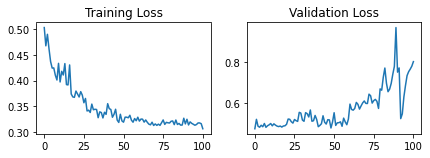

FileNotFoundError: [Errno 2] No such file or directory: '../../Results/CNN_Vicon_Scores.png'

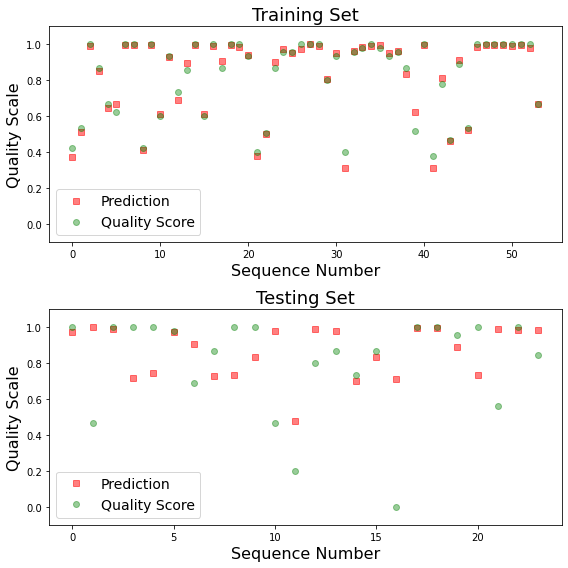

In [28]:
Mean_abs_dev, RMS_dev  = Network()

In [45]:
timesteps = 400 # Number of timesteps
nr = 78   # Number of repetitions
n_dim = 2  # Dimension of data sequences
dropout_rate = 0.2   # Droput rate

In [29]:
input1 = Input(shape = (None,), name = 'ip1')
embed1 = layers.Embedding(2501, 5, mask_zero = True)(input1)
encoded_input1 = layers.LSTM(32)(embed1)

input2 = Input(shape = (None,), name = 'ip2')
embed2 = layers.Embedding(2501, 5, mask_zero = True)(input2)
encoded_input2 = layers.LSTM(32)(embed2)
# concatenated = layers.Average()([encoded_input1, encoded_input2])

concatenated = layers.concatenate([encoded_input1, encoded_input2], axis = 1)
print(concatenated.shape)
output = layers.Dense(1,activation='softmax')(concatenated)


model = Model([input1, input2], output);
model.compile(optimizer='adam',
loss='mse',
metrics=['acc'])
model.summary()

(None, 64)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
ip1 (InputLayer)                [(None, None)]       0                                            
__________________________________________________________________________________________________
ip2 (InputLayer)                [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, None, 5)      12505       ip1[0][0]                        
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 5)      12505       ip2[0][0]                        
___________________________________________________________________________________

In [46]:
x_val /= np.max(np.abs(x_val))
po_val /= np.max(np.abs(po_val))
x_train, x_test, y_train, y_test = train_test_split(x_val,po_val, test_size=0.3)
print(y_train)

[0.6        0.4        0.97777778 1.         0.46666667 0.46666667
 0.77777778 1.         0.73333333 1.         0.6        0.95555556
 1.         0.86666667 1.         0.46666667 0.95555556 1.
 1.         0.86666667 0.68888889 0.2        0.95555556 1.
 0.97777778 1.         0.51892174 1.         0.4        0.66666667
 1.         0.93333333 1.         0.53333333 1.         0.93333333
 1.         0.86666667 0.62629279 1.         1.         0.85554259
 1.         0.8        0.         0.97777778 1.         0.53333333
 0.95555556 0.37777778 1.         0.8        0.66666667 1.        ]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

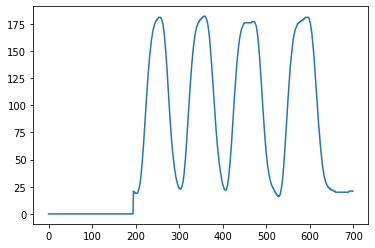

In [63]:
plt.plot(x_val[0,:,:1])

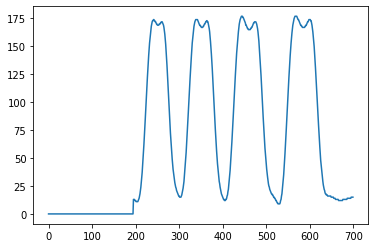

In [64]:
plt.plot(x_val[0,:,1:])

In [30]:
history = model.fit([x_train[:,:,0], x_train[:,:,1]], y_train,epochs=100, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 6s 1s/step - loss: 0.0760 - acc: 0.2953 - val_loss: 0.0569 - val_acc: 0.6364
Epoch 2/100
2/2 [==============================] - 0s 142ms/step - loss: 0.0779 - acc: 0.2953 - val_loss: 0.0569 - val_acc: 0.6364
Epoch 3/100
2/2 [==============================] - 0s 141ms/step - loss: 0.0759 - acc: 0.3161 - val_loss: 0.0569 - val_acc: 0.6364
Epoch 4/100
2/2 [==============================] - 0s 159ms/step - loss: 0.0796 - acc: 0.3161 - val_loss: 0.0569 - val_acc: 0.6364
Epoch 5/100
2/2 [==============================] - 0s 143ms/step - loss: 0.0703 - acc: 0.3057 - val_loss: 0.0569 - val_acc: 0.6364
Epoch 6/100
2/2 [==============================] - 0s 146ms/step - loss: 0.0757 - acc: 0.2953 - val_loss: 0.0569 - val_acc: 0.6364
Epoch 7/100
2/2 [==============================] - 0s 143ms/step - loss: 0.0857 - acc: 0.2745 - val_loss: 0.0569 - val_acc: 0.6364
Epoch 8/100
2/2 [==============================] - 0s 158ms/step - loss: 0.0742 - acc:

2/2 [==============================] - 0s 173ms/step - loss: 0.0761 - acc: 0.3057 - val_loss: 0.0569 - val_acc: 0.6364
Epoch 64/100
2/2 [==============================] - 0s 157ms/step - loss: 0.0705 - acc: 0.3266 - val_loss: 0.0569 - val_acc: 0.6364
Epoch 65/100
2/2 [==============================] - 0s 155ms/step - loss: 0.0715 - acc: 0.3057 - val_loss: 0.0569 - val_acc: 0.6364
Epoch 66/100
2/2 [==============================] - 0s 221ms/step - loss: 0.0766 - acc: 0.3057 - val_loss: 0.0569 - val_acc: 0.6364
Epoch 67/100
2/2 [==============================] - 0s 176ms/step - loss: 0.0795 - acc: 0.2953 - val_loss: 0.0569 - val_acc: 0.6364
Epoch 68/100
2/2 [==============================] - 0s 149ms/step - loss: 0.0763 - acc: 0.3266 - val_loss: 0.0569 - val_acc: 0.6364
Epoch 69/100
2/2 [==============================] - 0s 166ms/step - loss: 0.0782 - acc: 0.2745 - val_loss: 0.0569 - val_acc: 0.6364
Epoch 70/100
2/2 [==============================] - 0s 196ms/step - loss: 0.0756 - acc: 0

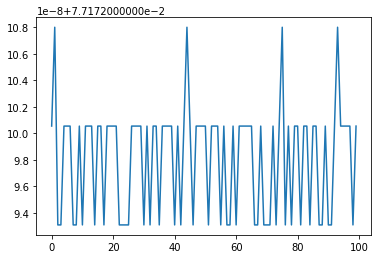

In [31]:
plt.plot(history.history['loss'])

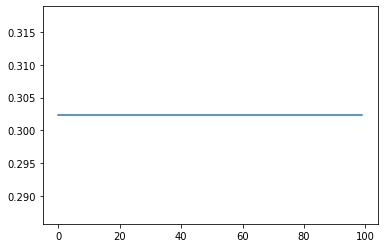

In [32]:
plt.plot(history.history['acc'])

In [34]:
y_pred = model.predict([x_test[:,:,0],x_test[:,:,1]])
y_pred

In [50]:
# Build RNN model ...
def Network_rnn():
    model = Sequential()

    model.add(Bidirectional(LSTM(50, recurrent_dropout = 0.5, return_sequences = True), input_shape = (timesteps,n_dim)))
    model.add(Dropout(0.2))

    model.add(Dense(30, activation = 'tanh'))
    model.add(Dropout(0.5))

    model.add(Bidirectional(LSTM(10, recurrent_dropout = 0.5)))
    model.add(Dropout(0.25))

    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer=Adam())
    #model.summary()
    
    # Measure the training time and implement early stoping
    t = now()
    
    early_stopping = EarlyStopping(monitor='val_loss', patience = 100)

    history = model.fit(x_train, y_train, batch_size=10, epochs=100, verbose=1, 
                         validation_data=(x_test, y_test),
                         callbacks = [early_stopping])
    print('Training time: %s' % (now() - t))
    
    # Plot the results
    plt.figure(1)
    plt.subplot(221)
    plt.plot(history.history['loss'])
    plt.title('Training Loss')
    plt.subplot(222)
    plt.plot(history.history['val_loss'])
    plt.title('Validation Loss')
    plt.tight_layout()
    plt.show()
    
    # Plot the prediction of the RNN model for the training and validation sets
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)

    plt.figure(figsize = (8,8))
    plt.subplot(2,1,1)
    plt.plot(pred_train,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
    plt.plot(y_train,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
    plt.ylim([-0.1,1.1])
    plt.title('Training Set',fontsize=18)
    plt.xlabel('Sequence Number',fontsize=16)
    plt.ylabel('Quality Scale',fontsize=16)
    plt.legend(loc=3, prop={'size':14}) # loc:position
    plt.subplot(2,1,2)
    plt.plot(pred_test,'s', color='red', label='Prediction', linestyle='None', alpha = 0.5, markersize=6)
    plt.plot(y_test,'o', color='green',label='Quality Score', alpha = 0.4, markersize=6)
    plt.title('Testing Set',fontsize=18)
    plt.ylim([-0.1,1.1])
    plt.xlabel('Sequence Number',fontsize=16)
    plt.ylabel('Quality Scale',fontsize=16)
    plt.legend(loc=3, prop={'size':14}) # loc:position
    plt.tight_layout()
    plt.savefig('../../Results/RNN_Vicon_Scores.png', dpi=300)
    plt.show()
        
    # Calculate the cumulative deviation and rms deviation for the validation set
    test_dev = abs(np.squeeze(pred_test)-np.squeeze(y_test))
    mean_abs_dev = np.mean(test_dev)
    print('mean absolute deviation', mean_abs_dev)

    # RMS deviation
    rms_dev = sqrt(mean_squared_error(pred_test, y_test))
    print('rms deviation', rms_dev)
    
    return mean_abs_dev, rms_dev

Epoch 1/100
6/6 [==============================] - 7s 477ms/step - loss: 0.6815 - val_loss: 0.6046
Epoch 2/100
6/6 [==============================] - 2s 423ms/step - loss: 0.6090 - val_loss: 0.5263
Epoch 3/100
6/6 [==============================] - 2s 386ms/step - loss: 0.5428 - val_loss: 0.4539
Epoch 4/100
6/6 [==============================] - 2s 402ms/step - loss: 0.4955 - val_loss: 0.4065
Epoch 5/100
6/6 [==============================] - 3s 493ms/step - loss: 0.4878 - val_loss: 0.4014
Epoch 6/100
6/6 [==============================] - 3s 562ms/step - loss: 0.4579 - val_loss: 0.4004
Epoch 7/100
6/6 [==============================] - 4s 714ms/step - loss: 0.4778 - val_loss: 0.4000
Epoch 8/100
6/6 [==============================] - 3s 547ms/step - loss: 0.4888 - val_loss: 0.3988
Epoch 9/100
6/6 [==============================] - 2s 419ms/step - loss: 0.4857 - val_loss: 0.3987
Epoch 10/100
6/6 [==============================] - 4s 689ms/step - loss: 0.5179 - val_loss: 0.3998
Epoch 11/

6/6 [==============================] - 2s 410ms/step - loss: 0.4473 - val_loss: 0.4197
Epoch 84/100
6/6 [==============================] - 4s 690ms/step - loss: 0.4392 - val_loss: 0.4268
Epoch 85/100
6/6 [==============================] - 3s 483ms/step - loss: 0.4594 - val_loss: 0.4164
Epoch 86/100
6/6 [==============================] - 4s 671ms/step - loss: 0.3835 - val_loss: 0.3868
Epoch 87/100
6/6 [==============================] - 3s 472ms/step - loss: 0.4174 - val_loss: 0.4055
Epoch 88/100
6/6 [==============================] - 2s 430ms/step - loss: 0.3940 - val_loss: 0.4290
Epoch 89/100
6/6 [==============================] - 4s 745ms/step - loss: 0.4296 - val_loss: 0.4177
Epoch 90/100
6/6 [==============================] - 3s 562ms/step - loss: 0.4366 - val_loss: 0.3938
Epoch 91/100
6/6 [==============================] - 4s 643ms/step - loss: 0.4674 - val_loss: 0.3770
Epoch 92/100
6/6 [==============================] - 4s 614ms/step - loss: 0.4645 - val_loss: 0.3739
Epoch 93/100


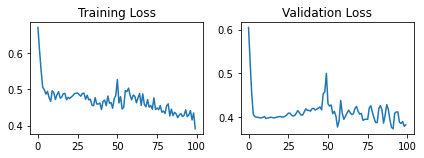

FileNotFoundError: [Errno 2] No such file or directory: '../../Results/RNN_Vicon_Scores.png'

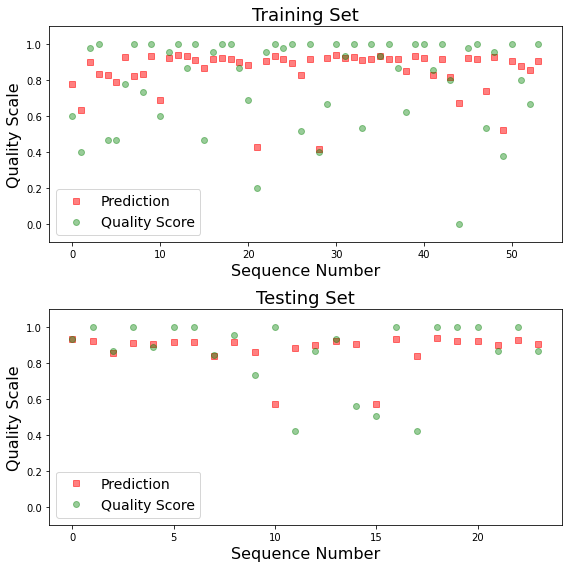

In [51]:
Mean_abs_dev_rnn, RMS_dev_rnn  = Network_rnn() 